Name : Smayan Kulkarni  
Roll number : D100
SAP ID : 60009230142    

Colab Link : https://colab.research.google.com/github/SmayanKulkarni/AI-and-ML-Course/blob/master/ML-LAB/ML_LAB8.ipynb

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler


In [ ]:
features,true_labels=make_blobs(n_samples=200,centers=3,cluster_std=2.5,random_state=11)

In [ ]:
features[:5]

array([[ -6.98773234, -12.69136069],
       [ -3.4829688 ,  -2.80241813],
       [ -1.56234265, -14.594424  ],
       [ -2.0607476 ,  -3.71406804],
       [ -2.01631897,   2.94866913]])

In [ ]:
scaler=StandardScaler()
scaled_features=scaler.fit_transform(features)
scaled_features[:5]

array([[-1.21245589, -1.72164895],
       [-0.15483199, -0.16476943],
       [ 0.42475066, -2.02126039],
       [ 0.27434822, -0.30829631],
       [ 0.28775534,  0.74066105]])

In [ ]:
kmeans=KMeans(init='random',n_clusters=3,n_init=10,max_iter=300,random_state=11)

In [ ]:
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=3, n_init=10, random_state=11)

In [ ]:
kmeans.inertia_

107.03133707380819

In [ ]:
kmeans.cluster_centers_

array([[ 1.1789836 ,  0.75016455],
       [-0.95072428, -1.21517858],
       [-0.01807672,  0.53451222]])

In [ ]:
kmeans.n_iter_

13

In [ ]:
kmeans.labels_[:5]

array([1, 2, 1, 2, 2], dtype=int32)

Task 2

In [ ]:
kmeans_kwargs={"init": "random","n_init":10,"max_iter":300,"random_state":11}

In [ ]:
sse=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,**kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

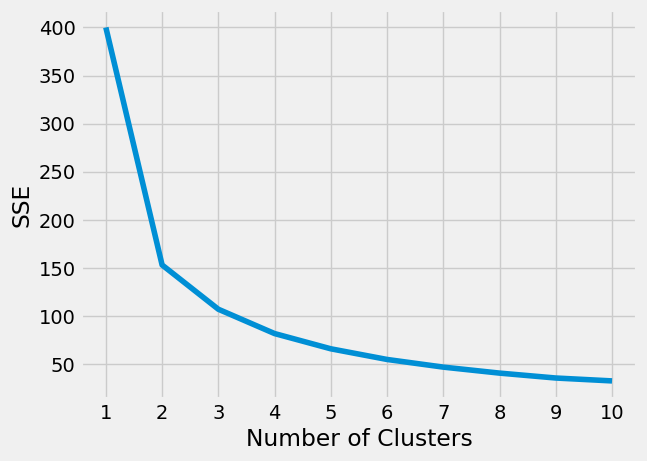

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(1,11),sse)
plt.xticks(range(1,11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

Task 3

In [ ]:
silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,**kmeans_kwargs)
    kmeans.fit(scaled_features)
    score=silhouette_score(scaled_features,kmeans.labels_)
    silhouette_coefficients.append(score)

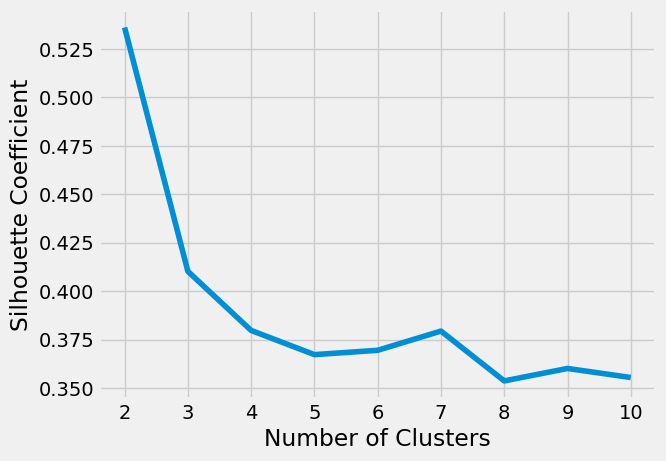

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import urllib

In [ ]:
url="https://archive.ics.uci.edu/ml/machine-learning-databases/00401/"
archive_name="TCGA-PANCAN-HiSeq-801x20531.tar.gz"

In [ ]:
full_download_url=urllib.parse.urljoin(url,archive_name)

In [ ]:
r=urllib.request.urlretrieve(full_download_url,archive_name)

In [ ]:
import tarfile
import numpy as np

In [ ]:
tar=tarfile.open(archive_name,"r:gz")
tar.extractall()
tar.close()

In [ ]:
datafile='TCGA-PANCAN-HiSeq-801x20531/data.csv'
labels_file="TCGA-PANCAN-HiSeq-801x20531/labels.csv"
data=np.genfromtxt(datafile,delimiter=",",usecols=range(1,20532),skip_header=1)
true_label_names=np.genfromtxt(labels_file,delimiter=",",usecols=(1,),skip_header=1,dtype="str")

In [ ]:
data[:5,:3]

array([[0.        , 2.01720929, 3.26552691],
       [0.        , 0.59273209, 1.58842082],
       [0.        , 3.51175898, 4.32719872],
       [0.        , 3.66361787, 4.50764878],
       [0.        , 2.65574107, 2.82154696]])

In [ ]:
true_label_names[:5]

array(['PRAD', 'LUAD', 'PRAD', 'PRAD', 'BRCA'], dtype='<U4')

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
true_labels=label_encoder.fit_transform(true_label_names)
true_labels[:5]

array([4, 3, 4, 4, 0])

In [ ]:
from os import pipe
n_clusters=len(label_encoder.classes_)
preprocessor=Pipeline([("scaler",MinMaxScaler()),("pca",PCA(n_components=2,random_state=11))])
clusterer=Pipeline([("kmeans",KMeans(n_clusters=n_clusters,init='k-means++',n_init=50,max_iter=500,random_state=11))])
pipe=Pipeline([("preprocessor",preprocessor),("clusterer",clusterer)])
pipe.fit(data)

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('scaler', MinMaxScaler()),
                                 ('pca',
                                  PCA(n_components=2, random_state=11))])),
                ('clusterer',
                 Pipeline(steps=[('kmeans',
                                  KMeans(max_iter=500, n_clusters=5, n_init=50,
                                         random_state=11))]))])

In [ ]:
preprocessed_data=pipe["preprocessor"].transform(data)
predicted_labels=pipe["clusterer"]["kmeans"].labels_
silhouette_score(preprocessed_data,predicted_labels)

0.5118775523994354

In [ ]:
from sklearn.metrics import adjusted_rand_score
adjusted_rand_score(true_labels,predicted_labels)

0.722276752060253

In [ ]:
import pandas as pd
dft=pd.read_csv("titanic_train.csv")
dft.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
dft.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
dft.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
dft = dft.drop(columns=['PassengerId', 'Survived', 'Cabin', 'SibSp', 'Parch', 'Ticket'])

In [ ]:
dft['Age']=dft['Age'].fillna(dft['Age'].mean())

In [ ]:
dft.isnull().sum()

Pclass      0
Name        0
Sex         0
Age         0
Fare        0
Embarked    2
dtype: int64

In [ ]:
dft['Embarked'].fillna(dft['Embarked'].mode()[0])

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [ ]:
dft = dft[['Age', 'Fare']]

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
dft = imputer.fit_transform(dft)

In [ ]:
preprocessor=Pipeline([("scaler",MinMaxScaler()),("pca",PCA(n_components=2,random_state=11))])

In [ ]:
from sklearn.cluster import KMeans
clusterer = Pipeline([("kmeans", KMeans(n_clusters=3, random_state=11))])

In [ ]:
from sklearn.pipeline import make_pipeline
pipeline = make_pipeline(preprocessor, clusterer)

In [ ]:
pipeline.fit(dft)

Pipeline(steps=[('pipeline-1',
                 Pipeline(steps=[('scaler', MinMaxScaler()),
                                 ('pca',
                                  PCA(n_components=2, random_state=11))])),
                ('pipeline-2',
                 Pipeline(steps=[('kmeans',
                                  KMeans(n_clusters=3, random_state=11))]))])

In [ ]:
labels = pipeline.predict(dft)

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_score(preprocessed_data, predicted_labels)

0.5118775523994354